<a href="https://colab.research.google.com/github/AmeenReda1/Text_classification_NADACorpus/blob/main/Text_Classification_NADACorpus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
#Text_Classification_NADACorpus


In [28]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm,preprocessing,metrics

In [30]:
!pip install nltk
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
dataFrame=pd.read_csv('/content/drive/MyDrive/Sampled_File_with_SMOTE.csv')
stop=stopwords.words('arabic')
print(stop)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['إذ', 'إذا', 'إذما', 'إذن', 'أف', 'أقل', 'أكثر', 'ألا', 'إلا', 'التي', 'الذي', 'الذين', 'اللاتي', 'اللائي', 'اللتان', 'اللتيا', 'اللتين', 'اللذان', 'اللذين', 'اللواتي', 'إلى', 'إليك', 'إليكم', 'إليكما', 'إليكن', 'أم', 'أما', 'أما', 'إما', 'أن', 'إن', 'إنا', 'أنا', 'أنت', 'أنتم', 'أنتما', 'أنتن', 'إنما', 'إنه', 'أنى', 'أنى', 'آه', 'آها', 'أو', 'أولاء', 'أولئك', 'أوه', 'آي', 'أي', 'أيها', 'إي', 'أين', 'أين', 'أينما', 'إيه', 'بخ', 'بس', 'بعد', 'بعض', 'بك', 'بكم', 'بكم', 'بكما', 'بكن', 'بل', 'بلى', 'بما', 'بماذا', 'بمن', 'بنا', 'به', 'بها', 'بهم', 'بهما', 'بهن', 'بي', 'بين', 'بيد', 'تلك', 'تلكم', 'تلكما', 'ته', 'تي', 'تين', 'تينك', 'ثم', 'ثمة', 'حاشا', 'حبذا', 'حتى', 'حيث', 'حيثما', 'حين', 'خلا', 'دون', 'ذا', 'ذات', 'ذاك', 'ذان', 'ذانك', 'ذلك', 'ذلكم', 'ذلكما', 'ذلكن', 'ذه', 'ذو', 'ذوا', 'ذواتا', 'ذواتي', 'ذي', 'ذين', 'ذينك', 'ريث', 'سوف', 'سوى', 'شتان', 'عدا', 'عسى', 'عل

In [31]:
dataFrame['text']=dataFrame['text'].apply(lambda line: " ".join(word for word in line.split() if word not in stop))
print(dataFrame.head())
print(len(dataFrame['text']))
dataFrame.drop_duplicates(subset ="text",
                     keep = 'first', inplace = True)
print(len(dataFrame['text']))

                                                text                     class
0  'غالبيت اصول اعمال باقرب ست رحب دولار اختصارا ...  'الإقتصاد-علوم اجتماعية'
1  'اضافت اخير بنك دول مال رئيس اعمال يقلص افق لا...  'الإقتصاد-علوم اجتماعية'
2  'مستقره اضافت اخير دول اتفاق اعمال يقلص افق لا...  'الإقتصاد-علوم اجتماعية'
3  'اوسط سرق بنك عاما ثان متحده مخبرا لملا الفضول...  'الإقتصاد-علوم اجتماعية'
4  'اوسط اطول عاما ثان متحده بان مخبرا لملا اعمال...  'الإقتصاد-علوم اجتماعية'
13066
5745


In [32]:
train_x, valid_x, train_y, valid_y = train_test_split(dataFrame['text'], dataFrame['class'],test_size=0.2)
print(len(set(train_y)))
print(len(set(valid_y)))
before_encode_valid_y=dataFrame['class'].unique()
print('before_encode: ',before_encode_valid_y)
# TFIDF feature generation for a maximum of 5000 features
print("vaild X",valid_x.head())
print("vaild X",valid_y.head())
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)
tfidf_vect = TfidfVectorizer(analyzer='word',token_pattern=r'\w{1,}', max_features=5000)
print(tfidf_vect)
tfidf_vect.fit(dataFrame['text'])
xtrain_tfidf = tfidf_vect.transform(train_x)
xvalid_tfidf = tfidf_vect.transform(valid_x)
print(xtrain_tfidf.data)

10
10
before_encode:  ["'الإقتصاد-علوم اجتماعية'" "'الأدب العربي-أدبيات'" 'رياضة'
 "'علوم صحية-علوم تطبيقية'" "'السياسة-علوم اجتماعية'"
 "'القانون-علوم اجتماعية'" 'عام-اسلام-ديانات' "'علم الكمبيوتر-علوم بحتة'"
 "'عام- فنون'" "'فلك-علوم بحتة'"]
vaild X 6870    'صرف طارئ وفق مجلس دراس رئيس تال حال اعتماد اد...
3586    'رصدت شرك امن معلوم عالم موج جديد فيروس تصيب ا...
238     'اردن اسواق اتجا سوق بورص متداول بورصت تراجعا ...
1176    'شهدت صناديق استثمار سعود تفاوتا اسعار ثائق ار...
6895    'دينارا عقوب كاز مملك كاز فلسا جاء تال خامس في...
Name: text, dtype: object
vaild X 6870      'القانون-علوم اجتماعية'
3586    'علم الكمبيوتر-علوم بحتة'
238      'الإقتصاد-علوم اجتماعية'
1176     'الإقتصاد-علوم اجتماعية'
6895      'القانون-علوم اجتماعية'
Name: class, dtype: object
TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=5000,
            

In [33]:
def train_model(classifier, feature_vector_train, label,feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    return metrics.accuracy_score(predictions, valid_y),predictions

In [34]:
clf = svm.SVC(kernel='linear')
#train_model
accuracy,predictions=train_model(clf,xtrain_tfidf, train_y, xvalid_tfidf)
print("accuracy: ",accuracy*100)

accuracy:  98.34638816362053


In [35]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(valid_y,predictions))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        63
           1       0.98      1.00      0.99       238
           2       0.88      0.75      0.81        28
           3       0.98      0.98      0.98       240
           4       1.00      1.00      1.00        70
           5       0.99      0.99      0.99        72
           6       1.00      0.99      0.99        73
           7       1.00      1.00      1.00        52
           8       1.00      1.00      1.00       215
           9       0.97      0.98      0.97        98

    accuracy                           0.98      1149
   macro avg       0.98      0.96      0.97      1149
weighted avg       0.98      0.98      0.98      1149



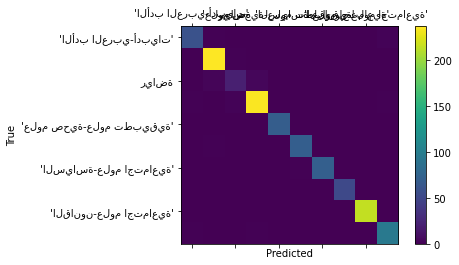

In [36]:
from sklearn.metrics import confusion_matrix

labels = before_encode_valid_y
cm = confusion_matrix(valid_y, predictions)
# print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
#plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [69]:
import re
import string
thesample1='بورصة مصر تهبط بخسائر سوقية 27 مليار جنيه بضغط مخاوف الضريبة وسط مطالب بالإلغاء'
thesample2='يتوقع علماء الفلك لمولود برج الميزان ، خلال الفترة المقبلة، أن يتعرض لمكيدة في العمل من جانب زميل له يشعر بالغيرة تجاهه ويريد ان يخرب علاقته بمديره، لكن سرعان ما تنكشف الأمور'
thesample3='موقع الكون - المجموعة الشمسية - حلقات زحل عودة للصفحة الرئيسية - سجل الزوار المجموعة الشمسية - الكواكب وتوابعها - حلقات زحل عودة إلى زحل إضغط على الصورة للتكبير حلقات زحل مع بعض أقماره v حلقات زحل المميزة لهذا الكوكب الجميل بعضها رقيق جدا، مع أن قطرها حوالي 250,000 كيلومتر أو أكثر فهي أقل في السمك من الكيلومتر الواحد في بعض الحلقات وتبلغ سمك بعضها الاخر حوالي 10 كيلومتر ، على الرغم من شكلها الرائع، فإن هناك القليل جدا من المواد فيها، وإذا ضغطت هذه الحلقات في جسم واحد سوف تكون جسم لا يتعدى حجمه أكثر من 100 كيلومتر، ذرات الحلقة هي من الثلج المائي، أو ربما تتكون من ذرات صخرية يغلفها الثلج. أوضحت الصور الملتقطة لحلقات زحلِ انها مكونة من مئات آلالاف من الحلقات، وكذلك مناطقِ الفجوات بين الحلقات تحتوي أيضا على حلقات أضعف. كما ةتشير الدلائل على أن تلك الحلقات هي من جزيئات التي في الغالب من بلورات الثلجِ، وبأحجام قد تكون كبيرة بالأمتار أو صغيرة بالسنتيمترات، أما الكتلة الكلية للحلقات فهي تقدر بكتلة قمر متوسط الحجم. نشؤء الحلقة أصل حلقات زحل مجهولة، مع أنه من الممكن أنها تكونت مع تكون الكوكب نفسه، او ربما انها كانت قمرا ثم أنفجر وتفتت بفعل جاذبية زحل وجذب ذلك الكوكب بقايا الانفجار لتدور في فلكه ، وهناك رأي أخر يقول ان الحلقات ما هي إلا مواد من أقمار زحل نفسه جذبها الكوكب، وأنظمة الحلقة غير مستقرة وهي تتجدد بإستمرار بتأثير العمليات المستمرة، اما المجموعة الحالية للحلقات يحتمل أن تكون بعمر فقط بضعة مئات الملايين من السنين. كان من المتوقع أن الإصطدامات التي تحدث بين جزيئات او مكونات الحلقة هي التي تؤثر على شكل الحلقة. لكن الرحلات الفضائية اوضحت عاملا أخر يؤثر على شكل وترتيب الحلقات وهو عامل التنافر في الشحنات الكهربائية التي تشحن الجزيئات إلى جانب عامل القوة الجذبية . كما اوضحت الاكتشافات التي تمت من خلال رحلة فواجير أن الحلقات ليس من الضروري ان تكون دائرية، كما اكتشف أن الحلقة الخارجيةَ لحلقة ظلت في مكانها بالتفاعل التجاذبي من قمرين صغيرين يقع احدهما داخل الحلقة والاخر خارجها. ترتيب الحلقات تتكون حلقات كوكب زحلِ من خمس حلقات رئيسيةِ هي: G و F و A و B و C مرتبة من الخارج إلى الداخل (في الواقع هذه التقسيماتِ الرئيسيةِ مقسمة إلى آلافِ الحلقات الفرديةِ). الحلقات F و G حلقات رقيقة وصعبة الرؤية، بينما الحلقات الاخرى A و B و C حلقات واسعة وسهلة الرؤية. الفجوة الكبيرة بين الحلقة A و B تسمى قسم كاسيني. الإسم المسافة (كيلومتر) العرض (كم) السمك (كم) البداية النهاية D 66,000 73,150 7,150 C 74,500 92,000 17,500 فاصل ماكسويل ( Maxwell ) 87,500 88,000 500 B 92,000 117,500 25,500 0.1 - 1 قسم كاسيني (Cassini Div) 117,500 122,200 4,700 فاصل فاصل هويجنز ( Huygens ) 117,680 285-440 فاصل فرعي A 122,200 136,800 14,600 0.1 - 1 فاصل إنكي ( Encke ) 133,410 133,740 330 فاصل كيلر ( Keeler ) 136,510 136,550 40 F 140,210 30-500 G 165,800 173,800 8,000 100-1,000 E 180,000 480,000 300,000 1,000 وقد رصد العلماء انفجارا لأوكسجين ذري حول الكوكب، ويدلل ذلك على ان حلقات الكوكب من الممكن أن تتآكل وعلى ذلك يمكن لهذه الحلقات ان تندثر في غضون مئة مليون عام. ويفسر العلماء ان هذا الاوكسجين الذري يشير على وقوع تصادم بين الجسيمات في احدى حلقات الكوكب والتي تتألف من الثلج في معظمها ومن الممكن ان الغاز قد انبعث منها أثناء انشطارها نتيجة التصادم. الحلقة E والتي هي أبعد حلقات زحل وهي حلقة عريضة جدا لكنها ذات إضاءة خافتة تتكون من مواد دقيقة الحجم من الثلج والتراب، تبدأ من مدار القمر ميماس Mimas وتنتهي تقريبا حول مدار القمر ريا Rhea. alnomrosi.net 2005-2006 حقوق النشر متاحة للجميع بشرط ذكر المصدر'
thesample4='كوكب عطارد من أصغر الكواكب'
thesample5='بعد التحقيق مع المجرم المتهم في قتل كل فريقة بمشروع التخرج بسبب كثرة ساعات المزاكرة تم الحكم علية بعشر سنوات من التفاهة'
thesample6='هي علاقة السلطة بالمؤسسات، أو علاقة النفوذ في المؤسسات، وتلك العلاقات التي سوف تتم ترجمتها وتحويلها بإعتبرات بيستمولوجية. وتحدث عن مثال لذلك في فرنسا حول العلاقة بين العلوم السياسية والقانونية، فالقانون السياسي أو علم السياسة الفرنسي تطور أولاً في كلية الحقوق، فهناك دائرة القانون العام والعلوم السياسية، وفي لحظة ما من تطور العلوم السياسية أرادت تلك العلوم أن تستقل عن القانون، وبالتالي نشأت علاقات قوة متجاذبة بين دائرة أو كلية الحقوق وبين كلية العلوم السياسية، العلم السياسي أوجد لنفسه مؤسسته الخاصة ومهنته الخاصة بشكل مستقل عن كلية الحقوق، وهذه علاقات القوة تحولت ولكي "تتحرر" العلوم السياسية طوّرت تحليلاً للقانون على أنه مادة ليست بذات أهمية، فإن القانون لا يتطرق للمجتمع ولا يتحدث عن السياس'
def clean_samples(text):
  pattern = r'[0-9]'
  pattern2='r[^\w\s]'
# Match all digits in the string and replace them with an empty string
  new_string = re.sub(r'[0-9]', '', text)
  new_string=re.sub(r'[^\w\s]','',new_string)
  new_string = "".join([char for char in new_string if char not in string.ascii_letters]).strip()
  return new_string.strip()
text_clean=clean_samples(thesample)
print(text_clean)

هي علاقة السلطة بالمؤسسات أو علاقة النفوذ في المؤسسات وتلك العلاقات التي سوف تتم ترجمتها وتحويلها بإعتبرات بيستمولوجية وتحدث عن مثال لذلك في فرنسا حول العلاقة بين العلوم السياسية والقانونية فالقانون السياسي أو علم السياسة الفرنسي تطور أولا في كلية الحقوق فهناك دائرة القانون العام والعلوم السياسية وفي لحظة ما من تطور العلوم السياسية أرادت تلك العلوم أن تستقل عن القانون وبالتالي نشأت علاقات قوة متجاذبة بين دائرة أو كلية الحقوق وبين كلية العلوم السياسية العلم السياسي أوجد لنفسه مؤسسته الخاصة ومهنته الخاصة بشكل مستقل عن كلية الحقوق وهذه علاقات القوة تحولت ولكي تتحرر العلوم السياسية طورت تحليلا للقانون على أنه مادة ليست بذات أهمية فإن القانون لا يتطرق للمجتمع ولا يتحدث عن السياس


In [71]:
import numpy as np
def convert_sample_to_numbers(text):
  text_result=tfidf_vect.transform([text])
  return text_result
test=convert_sample_to_numbers(text_clean)
#tokens=convert_sample_to_numbers(thesample)

#c=clf.predict(np.array(tokens[-1]))    

In [72]:
print(encoder.inverse_transform(clf.predict(test)))


["'القانون-علوم اجتماعية'"]
